# 1. INTRODUÇÃO

O seguinte projeto tem o objetivo de criar um modelo de regressão para propor uma linha de crédito ao cliente, baseado nos dados fornecidos pelo mesmo.

# 1.1 INFORMAÇÃO DO DATASET


**CUSTID** : Identificação do cliente (Categorica).

**BALANCE** : Balanço da quantidade que o cliente tem na conta para a compra.

**BALANCEFREQUENCY** : Frequencia que o balanço é atualizado, entre 0 and 1 (1 = atualizado com frequência, 0 = não atualizado com frequência).

**PURCHASES** : Quantidade de compras realizadas pela conta.

**ONEOFFPURCHASES** : Quantidade maxima de compra uma só vez.

**INSTALLMENTSPURCHASES** : Quantidade de compras feitas parceladas.
**CASHADVANCE** : Dinheiro adiantado pelo cliente.

**PURCHASESFREQUENCY** : Frequência da compra realizada, score between 0 and 1 (1 = comprado com frequência, 0 = não comprado com frequência).

**ONEOFFPURCHASESFREQUENCY** : Frequência as compras acontecem de uma só vez (1 = comprado com frequência, 0 = Não comprado com frequência).

**PURCHASESINSTALLMENTSFREQUENCY** : Com que frequência as compras parceladas estão sendo feitas (1 = feitas com frequência, 0 = não feitas com frequência).

**CASHADVANCEFREQUENCY** : Frequência de adiatamentos em dinheiro.

**CASHADVANCETRX** : Numero de transações feitas em adiatamento em dinheiro.

**PURCHASESTRX** : Numero de transações de compras realizadas.

**CREDITLIMIT** : Limite de credito para usuário.

**PAYMENTS** : Quantidade de pagamentos por usuário.

**MINIMUM_PAYMENTS** : Quantidade minima de pagamentos realizados pelo usuário.

**PRCFULLPAYMENT** : Porcetagem de pagamentos finalizados.

**TENURE** : Posse de cartão de crédito por usuário.

# 2. IMPORTAÇÃO DO DATASET E BIBLIOTECAS

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pandas.core.algorithms import quantile
from numpy import ndarray
sns.set(rc={'figure.figsize':(11.7,8.27)}) # torna os gráficos maiores

In [4]:
dfcard = pd.read_csv('/content/drive/MyDrive/DATABASES/CC GENERAL.csv')

# 3. ANÁLISE E LIMPEZA DOS DADOS

Nessa sessão é realizada a análise do dataset e dados os tratamentos aos dados

In [5]:
dfcard.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
dfcard.drop(columns=['CUST_ID'], inplace=True) 
# Essa coluna não é relevante

In [7]:
dfcard

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
# tratamento de nulos
dfcard.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:

dfcard['CREDIT_LIMIT'].fillna(dfcard['CREDIT_LIMIT'].min(), inplace=True)

# preenchendo os dados nulos com os valores minimos

In [10]:
dfcard['MINIMUM_PAYMENTS'].fillna(dfcard['MINIMUM_PAYMENTS'].min(), inplace=True)

In [11]:
dfcard.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
dfcard.describe(percentiles=[0.25,0.5,0.75,0.95])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.952864,1733.143852,833.984123,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.915681,2895.063757,2335.989679,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
95%,5909.111808,1.000000,3998.619500,2671.094000,1750.087500,4647.169122,1.000000,1.000000,1.000000,0.583333,15.000000,57.000000,12000.000000,6082.090595,2719.566935,1.000000,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
dfcard = dfcard[(dfcard['BALANCE'] < dfcard['BALANCE'].quantile(.95)) & 
          (dfcard['PURCHASES'] < dfcard['PURCHASES'].quantile(.95)) &
          (dfcard['MINIMUM_PAYMENTS'] < dfcard['MINIMUM_PAYMENTS'].quantile(.95)) &
          (dfcard['PAYMENTS'] < dfcard['PAYMENTS'].quantile(.95)) &
          (dfcard['CREDIT_LIMIT'] < dfcard['CREDIT_LIMIT'].quantile(.95)) &
          (dfcard['PURCHASES_TRX'] < dfcard['PURCHASES_TRX'].quantile(.95)) &
          (dfcard['ONEOFF_PURCHASES'] < dfcard['ONEOFF_PURCHASES'].quantile(.95)) &
          (dfcard['CASH_ADVANCE'] < dfcard['CASH_ADVANCE'].quantile(.95))&
          (dfcard['CASH_ADVANCE_TRX'] < dfcard['CASH_ADVANCE_TRX'].quantile(.95))]

In [14]:
dfcard.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000
mean,995.151694,0.857780,579.426174,300.337948,279.366419,500.025960,0.469246,0.162995,0.346478,0.100031,1.823547,9.750872,3456.202556,974.664002,410.897522,0.153512,11.468750
std,1190.965770,0.252570,721.139243,517.630795,452.429074,902.031092,0.391970,0.261136,0.386524,0.152807,2.995315,11.296587,2465.720075,974.757099,443.575376,0.290509,1.404998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,75.973734,0.818182,41.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,320.166113,145.768171,0.000000,12.000000
50%,547.868765,1.000000,308.190000,0.000000,76.430000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2700.000000,651.613201,218.279833,0.000000,12.000000
75%,1462.396758,1.000000,832.010000,395.012500,387.702500,650.349033,0.916667,0.250000,0.750000,0.166667,3.000000,13.000000,5000.000000,1298.660032,531.724151,0.166667,12.000000
max,5906.184924,1.000000,3986.240000,2655.990000,3927.120000,4639.195255,1.000000,1.000000,1.000000,1.166667,14.000000,56.000000,11500.000000,6043.227704,2707.521979,1.000000,12.000000


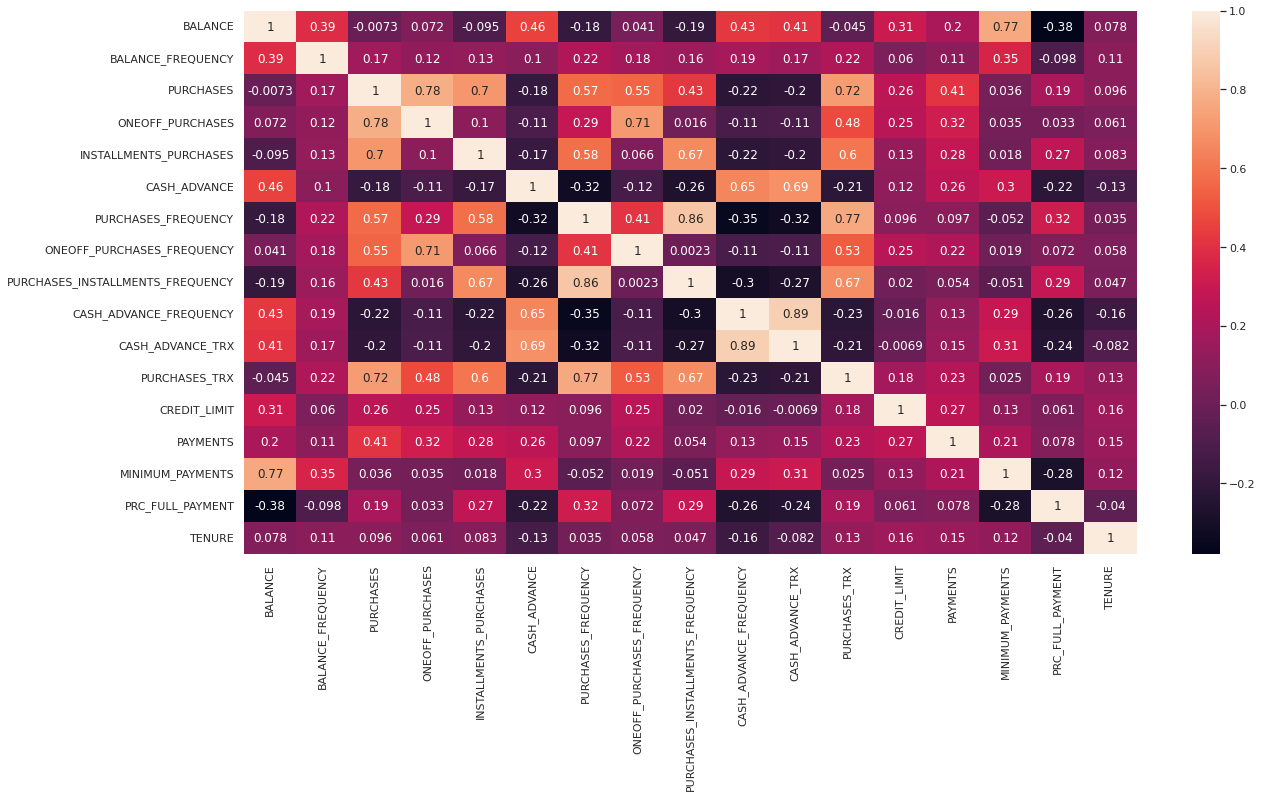

In [15]:
# analisando a correlação das variaveis
plt.figure(figsize=(20,10))
sns.heatmap(dfcard.corr(), annot=True)

# 4 CLUSTERIZAÇÃO

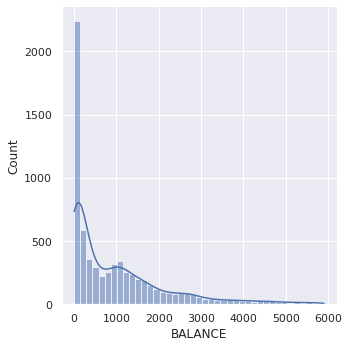

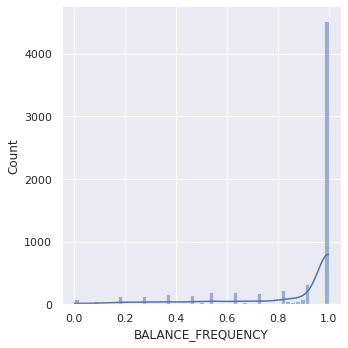

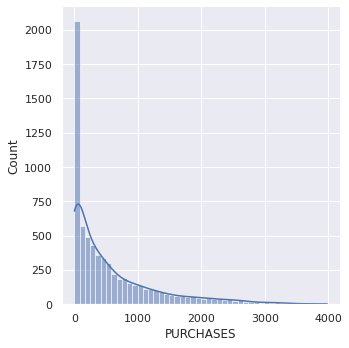

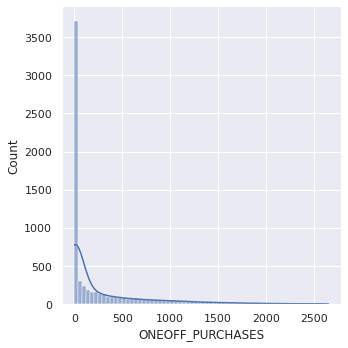

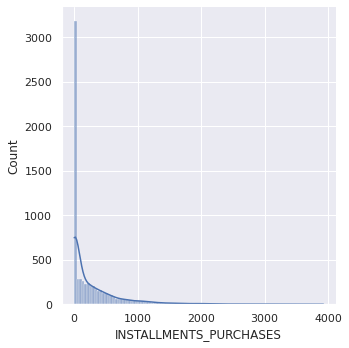

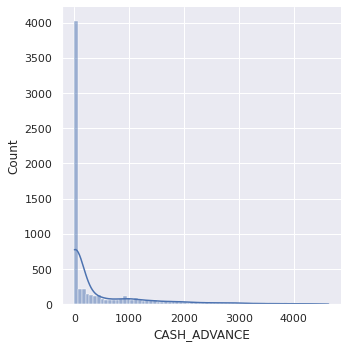

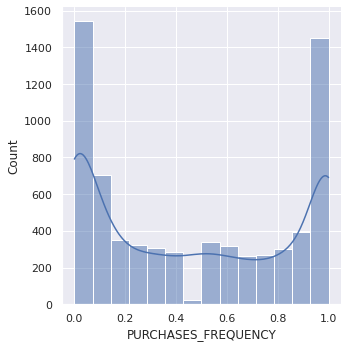

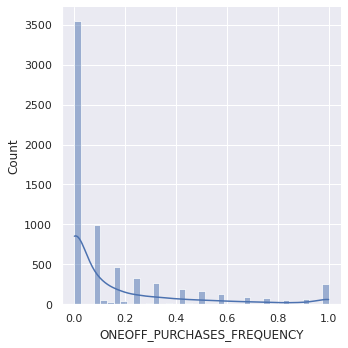

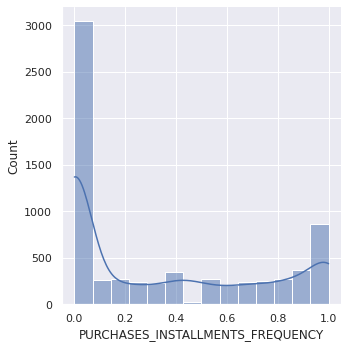

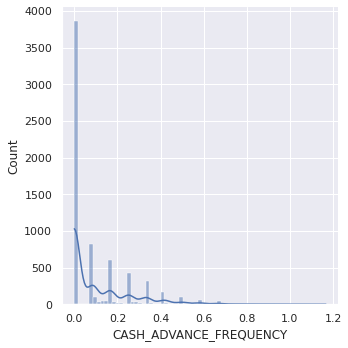

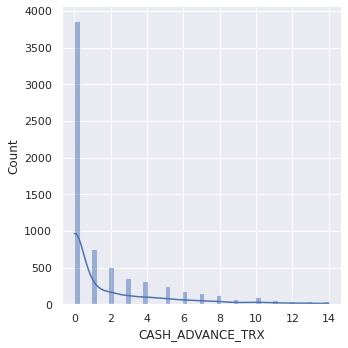

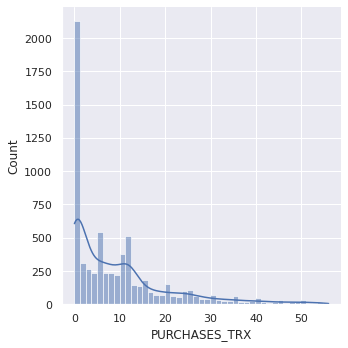

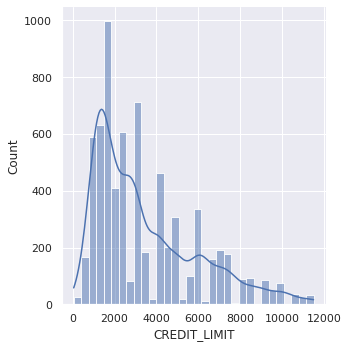

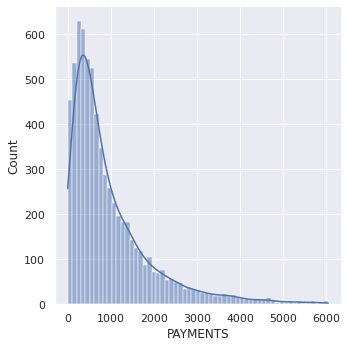

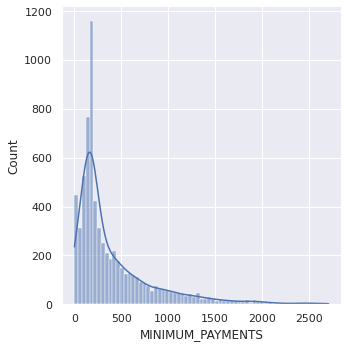

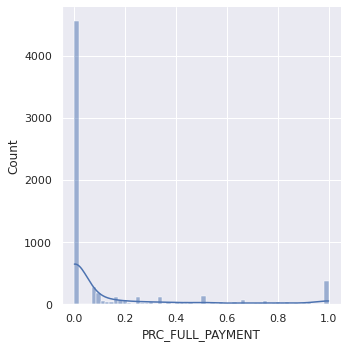

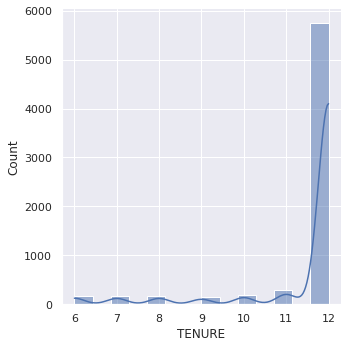

In [16]:
for i in dfcard.columns:
  sns.displot(dfcard[i],kde=True)
  # Aqui realizamos uma análise dos gráficos

In [17]:
# NORMALIZAÇÃO DOS DADOS
normalizar = Normalizer()
df_final = normalizar.fit_transform(dfcard)

# 5 MODELAGEM

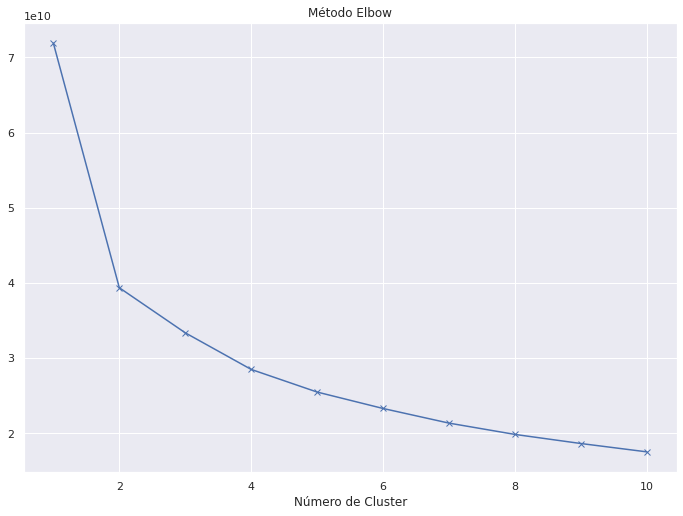

In [18]:
# NESSE PONTO UTILIZAREMOS OS METODOS PARA A ESCOLHA DOS CLUSTERS INICIANDO PELO METODO DO COTOVELO

inertias = []
K = range(1, 11)
from scipy.spatial.distance import cdist
for k in K:
    KmeanModel = KMeans(n_clusters=k).fit(dfcard)
    inertias.append(KmeanModel.inertia_)
plt.plot(range(1, 11), inertias, 'bx-')
plt.title('Método Elbow')
plt.xlabel('Número de Cluster')



plt.show()


# A curva de interseciona no 2, portanto o cotovelo nos mostra a quantidade de 2 clusters

In [19]:
# Agora utilizaremos o modelo da silhueta

from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

alvo = df_final
max = 15
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
gm_bic= []
gm_score=[]
for i in range(2,max):
    km = KMeans(n_clusters=i, random_state=0).fit(alvo)
    preds = km.predict(alvo)
    
    km_scores.append(-km.score(alvo))
    
    silhouette = silhouette_score(alvo,preds)
    km_silhouette.append(silhouette)


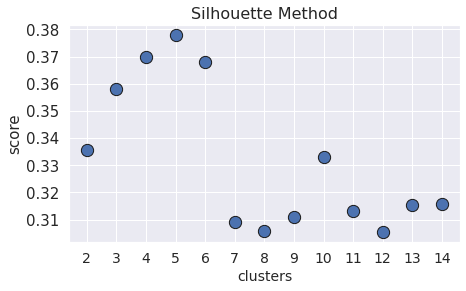

In [20]:
# PLOTAGEM DO GRÁFICO DE SILHUETA
plt.figure(figsize=(7,4))
plt.title("Silhouette Method",fontsize=16)
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("clusters",fontsize=14)
plt.ylabel("score",fontsize=15)
plt.xticks([i for i in range(2,max)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

# 5 MISTURA GAUSSIANA

In [21]:
GM = GaussianMixture(4).fit(df_final)
labels_gaussian_mixture = GM.predict(df_final)
dfcluster=pd.DataFrame(df_final, columns = dfcard.columns)
dfcluster['clusters']=labels_gaussian_mixture.astype('str')

In [22]:
dfcluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.00000,0.000000,0.001924,0.962156,0.194165,0.134230,0.0,0.011546,2
1,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.00000,0.000000,0.001495,0.934206,0.077485,0.078135,0.0,0.001495,2
2,0.209047,0.000080,0.188016,0.188016,0.000000,0.025812,0.000010,0.000010,0.000000,0.00001,0.000125,0.000125,0.940708,0.000000,0.000002,0.0,0.001505,3
3,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.00000,0.000000,0.000617,0.740040,0.418329,0.150963,0.0,0.007400,0
4,0.428658,0.000237,0.315788,0.000000,0.315788,0.000000,0.000158,0.000000,0.000138,0.00000,0.000000,0.001895,0.426330,0.331604,0.570156,0.0,0.002842,1


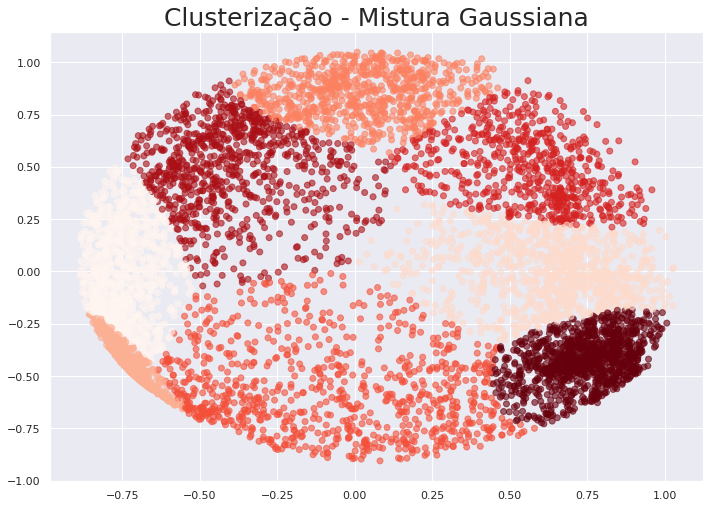

In [44]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_df =scaler.fit_transform(dfregre[['BALANCE','PURCHASES','MINIMUM_PAYMENTS','PAYMENTS','CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX']])
normalized_df = normalize(scaled_df,axis=1)
pca = PCA(n_components=2)
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
plt.title('Clusterização - Mistura Gaussiana',fontsize=25) 
plt.scatter(X_principal['P1'], 
            X_principal['P2'],
            c = GaussianMixture(n_components = 8).fit_predict(X_principal),
            alpha = 0.6,cmap='Reds')
plt.show()

# 6 REGRESSÃO



In [23]:
dfregre = dfcluster.copy()

In [24]:
dfregre.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.00000,0.000000,0.001924,0.962156,0.194165,0.134230,0.0,0.011546,2
1,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.00000,0.000000,0.001495,0.934206,0.077485,0.078135,0.0,0.001495,2
2,0.209047,0.000080,0.188016,0.188016,0.000000,0.025812,0.000010,0.000010,0.000000,0.00001,0.000125,0.000125,0.940708,0.000000,0.000002,0.0,0.001505,3
3,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.00000,0.000000,0.000617,0.740040,0.418329,0.150963,0.0,0.007400,0
4,0.428658,0.000237,0.315788,0.000000,0.315788,0.000000,0.000158,0.000000,0.000138,0.00000,0.000000,0.001895,0.426330,0.331604,0.570156,0.0,0.002842,1


In [25]:
# APLICANDO O ONE HOT ENCODING
dfregre = pd.get_dummies(dfregre, columns=['clusters'])

In [26]:
# TREINO E TESTE
X = dfregre.drop(columns = ['CREDIT_LIMIT'])
Y = dfregre[['CREDIT_LIMIT']]



In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)



# 7 INTRODUZINDO O MACHINE LEARNING

In [28]:
regr = MLPRegressor().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

In [30]:
print("RMSE treino = {}".format(mean_squared_error(y_train, y_pred_train)))
print("R² treino = {}".format(r2_score(y_train, y_pred_train)))
print("MAE treino = {}".format(mean_absolute_error(y_train, y_pred_train)))

RMSE treino = 0.0011822084611802194
R² treino = 0.9639561706829427
MAE treino = 0.020913996042482057


In [31]:
print("RMSE teste = {}".format(mean_squared_error(y_test, y_pred_test)))
print("R² teste = {}".format(r2_score(y_test, y_pred_test)))
print("MAE teste = {}".format(mean_absolute_error(y_test, y_pred_test)))

RMSE teste = 0.0012571846705362647
R² teste = 0.9596151439090406
MAE teste = 0.021116718387439323


In [32]:
params_grid = {
    'hidden_layer_sizes' : [(100,), (1,), (50,)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha' : [0.0005, 0.0001, 0.01],
    'learning_rate' : ['constant', 'invscaling', 'adaptive']
}

In [33]:
clf = MLPRegressor()

grid_search = GridSearchCV(clf, param_grid=params_grid, cv=5, n_jobs=-1, verbose=2) # aqui aplicamos o cross-validation
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0005, 0.0001, 0.01],
                         'hidden_layer_sizes': [(100,), (1,), (50,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=2)

In [34]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [35]:
print("RMSE = {}".format(mean_squared_error(y_test, y_pred, squared=False)))
print("R² = {}".format(r2_score(y_test, y_pred)))
print("MAE = {}".format(mean_absolute_error(y_test, y_pred)))

RMSE = 0.01476772330239036
R² = 0.9929943803331406
MAE = 0.009004055734553804


O modelo obteve melhora após a realização da clusterização